In [31]:
#init

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

def distantion(x,y):
    
    z = x - y
    z **= 2
    return math.sqrt(z.sum())

poi_am = 100      # amount of points needed to be generated
pl_size = 15      # size of our R^2 zone, will be +- plane_size all dimensions 
prec = 2        # cutting the numbers n signs after .
dim = 2       # amount of dimensions

cen_am = 7    # amount of centers of pre-generated groups

In [32]:
#generating centers

centers = (np.round(2 * pl_size * (0.5 - np.random.rand(cen_am * 2)), prec)).reshape(-1, dim)

centers

array([[ -6.21,   3.57],
       [  7.46,  -4.87],
       [ -6.3 ,  -0.54],
       [-12.18,  -2.36],
       [  2.97,   9.46],
       [ -6.75,  -9.35],
       [ 11.28,  -3.55]])

In [33]:
#making web of dots of our planar zone
#web_associate - associations for each dot, made this way for easement
# how enumerating works - it goes in outer cycle of x from -10 to 10, inner cycle of y from 10 to -10
# so, to find point [-5, 5] you'll have to add 21 * 5 for x and 5 for y
# number for point (x,y) is 21 * (10 + x) + (10 - y)

web = np.concatenate([np.full(2 * pl_size + 1, -1 * pl_size), -1 * np.arange(2 * pl_size + 1) + pl_size])
                      
web = web.reshape(2, -1).T

dots_am = (2 * pl_size + 1) ** 2
dots_line = 2 * pl_size + 1

for i in range(2 * pl_size):
    
    j = i - pl_size + 1
    
    web_add = np.concatenate([np.full(2 * pl_size + 1, j), -1 * np.arange(2 * pl_size + 1) + pl_size])
    web_add = web_add.reshape(2, -1).T
    
    web = np.concatenate([web, web_add])

web_associate = np.full(dots_am, 0)

web

array([[-15,  15],
       [-15,  14],
       [-15,  13],
       ...,
       [ 15, -13],
       [ 15, -14],
       [ 15, -15]])

In [34]:
#associating web with centers

for i in range(dots_am):
    
    curr = distantion(web[i], centers[0])
    for j in range(cen_am):
        
        if distantion(web[i], centers[j]) <= curr:
            
            curr = distantion(web[i], centers[j])
            web_associate[i] = j + 1

for i in range(dots_am):

    x = -1 * pl_size + int(i / dots_line)
    y = pl_size - (i - int(i / dots_line) * dots_line)


    if  web_associate[i] != 0:

        j = dots_line * (pl_size + x + 1) + (pl_size - y)   # moving x by 1 to the right
        k = dots_line * (pl_size + x) + (pl_size + 1 - y)   # moving y by 1 to the bottom

        if x < pl_size and j < dots_am:
            if web_associate[j] != 0 and web_associate[j] != web_associate[i]:

                web_associate[i] = 0

        if y > -1 * pl_size:

            if web_associate[k] != 0 and web_associate[k] != web_associate[i]:

                web_associate[i] = 0
        
web_associate

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 6, 6,
       6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 6, 6, 6, 6, 6, 6, 6,
       6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 4, 4, 4,
       0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 3, 3, 3, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 0, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3,
       3, 3, 3, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 0, 0, 6,

In [35]:
#abusing the colormap to generate enought colors

colors = [cm.hsv(i/(cen_am + 1)) for i in range(cen_am + 1)]


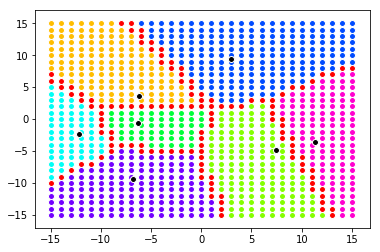

In [36]:
#let's see if we got anything worth working with

fig = plt.figure()

for i in range(dots_am):
    
    plt.scatter(web[i][0], web[i][1], color = colors[web_associate[i]], edgecolors = 'w')
    
for i in range(cen_am):
    
    plt.scatter(centers[i][0], centers[i][1], color = 'black', edgecolors = 'w')
    


In [164]:
# used just for tests

x = -10 + int(110 / 21)
y = 10 - (110 - int(110/21) * 21)

j = dots_line * (pl_size + x + 1) + (pl_size - y)
k = dots_line * (pl_size + x) + (pl_size +1 - y)

print(web[21 * (10 + x) + (10 - y)])
print(web[j], web[k])

[-12  -2]
[-4  5] [-5  4]


In [16]:
# starting building points

points = np.round(2 * pl_size * (0.5 - np.random.rand(2)), prec).reshape(-1, 2)

poin

array([[9.01, 9.28]])